In [30]:
import pandas as pd
import cx_Oracle
pd.set_option('display.max_columns', None)

In [2]:
ip = '172.16.80.74'
port = '1521'
SID = 'RPTDB'

dsn_tns = cx_Oracle.makedsn(ip, port, SID)
connection = cx_Oracle.connect('ANLYUSR', 'ANLYUSR$', dsn_tns, encoding='iso-8859-1')

In [187]:
query = "SELECT \
tb1.PROPNO,tb1.AGMTNO,tb1.DEALER_CODE,tb1.PORTFOLIO, \
tb6.PREPAIDPOSTPAIDFLAG, tb6.AVGMOBILEBILLAMOUNTLAST3MON, tb6.AVGMOBRECHARGEAMOUNTLAST3MON, \
tb4.INSTALLTIME,tb4.LASTPINGTIME,tb4.REQUESTTIME, \
tb1.DEALER_TYPE, \
tb1.PRODUCT_CODE, \
tb1.MODEL_CODE, \
tb1.SCHEME_TYPE, \
tb1.LTV, \
tb1.STATE, \
tb1.IMEI_NUMBER, \
tb7.MAKE_CODE, \
tb7.MODEL_DESC, \
tb2.CITY as DEALER_CITY, \
tb1.REGISTRATION_TYPE, \
tb1.SCHEME_CODE, \
tb1.CIBIL_HIT,tb1.SURROGATE, \
tb1.ACTUAL_LOAN_AMOUNT, \
tb1.CITY, \
tb5.LATESTBALANCE, \
tb1.GENDER, \
tb1.QUALIFICATION, \
tb1.AGE, \
tb1.CIBIL_SCORE, \
tb1.EXISTING_CUSTOMER, \
tb1.SPL_INSURANCE_TYPE, \
tb1.ADDRESS_TYPE,tb1.RESIDENT_TYPE, \
tb8.ADDRESS1, tb8.ADDRESS2, tb8.ADDRESS3, \
tb1.VOTERID,tb1.PANNO,tb1.DRIVING_LICENSE,tb1.PASSPORT,tb1.AADHAR,tb1.RATION, \
tb3.ACTIVITY_CODE, \
tb3.TAT_HOUR, \
tb3.TAT_DAYS,tb3.TAT_DAYS_EXCLUDE_SUNDAY, \
tb1.PAYMENT_TYPE, \
tb1.IFSC_CODE, \
tb1.ELIGIBILITYGRID, \
tb1.ELIGIBILITYGRID_REMARK \
FROM \
BIUSR.TBL_TRN_CUSTOMER_DETAILS tb1 \
INNER JOIN \
BIUSR.TBL_MST_DEALER tb2 \
ON tb1.DEALER_CODE = tb2.DEALER_CODE \
AND tb1.PORTFOLIO = 'CD' \
AND tb2.PORTFOLIO = 'CD' \
INNER JOIN \
BIUSR.TVS_TRAN_ACTIVITY tb3 \
ON tb1.PROPNO = tb3.PROPNO \
AND tb3.PORTFOLIO = 'CD' \
AND tb3.ACTIVITY_CODE = 'DISBURSAL_TAT' \
LEFT OUTER JOIN \
BIUSR.TBL_TRN_CV_METADATA tb4 \
ON tb1.PROPNO = tb4.PROPNO \
AND SUBSTR(tb4.PROPNO,5,2) = 'CD' \
LEFT OUTER JOIN \
ANLYUSR.TEM_TBL_TRN_CV_ACCOUNTS tb5 \
ON tb1.PROPNO = tb5.PROPNO \
AND SUBSTR(tb5.PROPNO,5,2) = 'CD' \
LEFT OUTER JOIN \
BIUSR.TBL_TRN_CV_UTILITYACCOUNT tb6 \
ON tb1.PROPNO = tb6.PROPNO \
AND SUBSTR(tb6.PROPNO,5,2) = 'CD' \
INNER JOIN \
BIUSR.TBL_MST_MODEL tb7 \
ON tb1.MODEL_CODE = tb7.MODEL_CODE \
AND tb7.PORTFOLIO = 'CD' \
INNER JOIN \
BIUSR.TBL_TRN_CUSTOMER_ADDRESS tb8 \
ON tb1.PROPNO = tb8.PROPNO \
AND tb8.ADDRESS_TYPE = 'RS' \
AND tb8.ADDRESS_SLNO = 1"

In [188]:
Data = pd.read_sql(query, con=connection, chunksize=40000)

In [189]:
data = pd.concat([chunk for chunk in Data])

In [190]:
data.head()

,PROPNO,AGMTNO,DEALER_CODE,PORTFOLIO,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,LATESTBALANCE,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,ADDRESS1,ADDRESS2,ADDRESS3,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,ELIGIBILITYGRID_REMARK
0,3078CD0009160,WB3078CD0009160,CD00910,CD,0,0.0,0.0,2018-04-23T12:10:07.466Z,2018-04-23T12:14:29.339Z,2018-04-23T20:12:08.774Z,DEALER,TV,CD0003748,CDOEM,68.18,WB,None,SAMSUNG,SAMSUNG TV UA43K5002AKXXL,DT1234,None,CD_M_0085,Y,None,32611.0,Jalpaiguri,190758.16,MALE,SSC,32,-1.0,None,None,RS,OWNED,DUMCHIPARA TEA GARDEN,JATHA LINE. .,None,N,Y,N,N,Y,N,DISBURSAL_TAT,22.52,0.94,0.94,ADM,SBIN0002025,None,No eligibility criteria matched
1,3078CD0009162,WB3078CD0009162,CD00458,CD,0,0.0,0.0,2018-04-23T10:08:59.507Z,2018-04-23T15:37:31.502Z,2018-04-23T19:15:05.057Z,DEALER,TV,CD0007287,CDOEM,66.66,WB,None,SONY,SONY TV KLV-32R302E IN5,DT1223,None,CD_M_0153,Y,None,16332.0,Murshidabad,NaN,MALE,GRADUATE,23,-1.0,None,None,RS,OWNED,JHAUBANA NAWDA,JHAUBANA NAWDA,None,N,N,N,N,Y,N,DISBURSAL_TAT,144.43,6.02,4.02,ADM,SBIN0007104,None,No eligibility criteria matched
2,3078CD0009161,WB3078CD0009161,CD00442,CD,None,NaN,NaN,None,None,None,DEALER,FRIDGE,CD0011224,CDOEM,66.65,WB,None,SAMSUNG,SAMSUNG FRIDGE RR20N2Y2ZD3/NL,DT1222,None,CD_M_0034,Y,None,11064.0,Bardhaman,NaN,MALE,12TH,43,-1.0,None,None,RS,OWNED,MATHRUN MONGALKOTE,MATHRUN BARDDHAMAN,None,N,N,N,N,Y,N,DISBURSAL_TAT,0.00,0.00,0.00,ACH,UBIN0540510,None,No eligibility criteria matched
3,3009CD0000002,KA3009CD0000002,CD01183,CD,0,0.0,0.0,2018-03-17T10:49:16.175Z,2018-03-17T14:48:12.875Z,2018-03-17T19:14:46.949Z,DEALER,TV,CD0002970,CDOEM,66.67,KA,None,PANASONIC,PANASONIC TV TH-32E200DX,DT1128,None,CD_M_0038,Y,None,10800.0,Bangalore,11575.00,FEMALE,UNDER GRADUATE,26,726.0,None,None,RS,RENT,#242 2ND MAIN ROAD VIJAYANANDANAGAR,BANGALORE NORTHBANGALORE NANDINILAYOUT,None,N,N,N,N,Y,N,DISBURSAL_TAT,3.21,0.13,0.13,ACH,ICIC0002317,7,CD/TW -720+ norms met
4,3009CD0000011,KA3009CD0000011,CD01216,CD,None,NaN,NaN,None,None,None,DEALER,TV,CD0006206,CDOEM,66.66,KA,None,SAMSUNG,SAMSUNG TV UA32M4200DRLXL,DT1128,None,CD_M_0034,Y,None,17332.0,Bangalore,NaN,MALE,SSC,23,710.0,None,None,RS,OWNED,"U84, 2 nd main road",swathantrapalya srirampura,None,N,N,N,N,Y,N,DISBURSAL_TAT,3.00,0.13,0.00,ACH,SBIN0007080,4,CD/TW- 650-719 norms met


In [191]:
data.count()

PROPNO                          675986
AGMTNO                          675986
DEALER_CODE                     675986
PORTFOLIO                       675986
PREPAIDPOSTPAIDFLAG             309756
AVGMOBILEBILLAMOUNTLAST3MON     309756
AVGMOBRECHARGEAMOUNTLAST3MON    309756
INSTALLTIME                     309765
LASTPINGTIME                    309765
REQUESTTIME                     309765
DEALER_TYPE                     675986
PRODUCT_CODE                    675986
MODEL_CODE                      675986
SCHEME_TYPE                     675986
LTV                             675986
STATE                           675986
IMEI_NUMBER                     330620
MAKE_CODE                       675986
MODEL_DESC                      675986
DEALER_CITY                     675986
REGISTRATION_TYPE                    0
SCHEME_CODE                     675986
CIBIL_HIT                       675986
SURROGATE                       303630
ACTUAL_LOAN_AMOUNT              675986
CITY                     

In [192]:
data_v2 = data

In [193]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675986 entries, 0 to 35985
Data columns (total 52 columns):
PROPNO                          675986 non-null object
AGMTNO                          675986 non-null object
DEALER_CODE                     675986 non-null object
PORTFOLIO                       675986 non-null object
PREPAIDPOSTPAIDFLAG             309756 non-null object
AVGMOBILEBILLAMOUNTLAST3MON     309756 non-null float64
AVGMOBRECHARGEAMOUNTLAST3MON    309756 non-null float64
INSTALLTIME                     309765 non-null object
LASTPINGTIME                    309765 non-null object
REQUESTTIME                     309765 non-null object
DEALER_TYPE                     675986 non-null object
PRODUCT_CODE                    675986 non-null object
MODEL_CODE                      675986 non-null object
SCHEME_TYPE                     675986 non-null object
LTV                             675986 non-null float64
STATE                           675986 non-null object
IMEI_NU

In [194]:
data_v2 = data_v2.drop_duplicates()

In [195]:
data_v2['PROPNO'].count()

673022

In [196]:
mandate = pd.read_excel("D:\CD\Mandate_not_registered.xlsx")

In [197]:
mandate['IS_MANDATE_REGISTERED'] = 0

In [198]:
mandate.head()

,AGMTNO,IS_MANDATE_REGISTERED
0,AP3019CD0000058,0
1,AP3019CD0000258,0
2,AP3019CD0000289,0
3,AP3019CD0000353,0
4,AP3019CD0000364,0


In [199]:
final_data = pd.merge(data_v2, mandate, on='AGMTNO', how='left')

In [200]:
final_data.head()

,PROPNO,AGMTNO,DEALER_CODE,PORTFOLIO,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,LATESTBALANCE,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,ADDRESS1,ADDRESS2,ADDRESS3,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,ELIGIBILITYGRID_REMARK,IS_MANDATE_REGISTERED
0,3078CD0009160,WB3078CD0009160,CD00910,CD,0,0.0,0.0,2018-04-23T12:10:07.466Z,2018-04-23T12:14:29.339Z,2018-04-23T20:12:08.774Z,DEALER,TV,CD0003748,CDOEM,68.18,WB,None,SAMSUNG,SAMSUNG TV UA43K5002AKXXL,DT1234,None,CD_M_0085,Y,None,32611.0,Jalpaiguri,190758.16,MALE,SSC,32,-1.0,None,None,RS,OWNED,DUMCHIPARA TEA GARDEN,JATHA LINE. .,None,N,Y,N,N,Y,N,DISBURSAL_TAT,22.52,0.94,0.94,ADM,SBIN0002025,None,No eligibility criteria matched,NaN
1,3078CD0009162,WB3078CD0009162,CD00458,CD,0,0.0,0.0,2018-04-23T10:08:59.507Z,2018-04-23T15:37:31.502Z,2018-04-23T19:15:05.057Z,DEALER,TV,CD0007287,CDOEM,66.66,WB,None,SONY,SONY TV KLV-32R302E IN5,DT1223,None,CD_M_0153,Y,None,16332.0,Murshidabad,NaN,MALE,GRADUATE,23,-1.0,None,None,RS,OWNED,JHAUBANA NAWDA,JHAUBANA NAWDA,None,N,N,N,N,Y,N,DISBURSAL_TAT,144.43,6.02,4.02,ADM,SBIN0007104,None,No eligibility criteria matched,NaN
2,3078CD0009161,WB3078CD0009161,CD00442,CD,None,NaN,NaN,None,None,None,DEALER,FRIDGE,CD0011224,CDOEM,66.65,WB,None,SAMSUNG,SAMSUNG FRIDGE RR20N2Y2ZD3/NL,DT1222,None,CD_M_0034,Y,None,11064.0,Bardhaman,NaN,MALE,12TH,43,-1.0,None,None,RS,OWNED,MATHRUN MONGALKOTE,MATHRUN BARDDHAMAN,None,N,N,N,N,Y,N,DISBURSAL_TAT,0.00,0.00,0.00,ACH,UBIN0540510,None,No eligibility criteria matched,NaN
3,3009CD0000002,KA3009CD0000002,CD01183,CD,0,0.0,0.0,2018-03-17T10:49:16.175Z,2018-03-17T14:48:12.875Z,2018-03-17T19:14:46.949Z,DEALER,TV,CD0002970,CDOEM,66.67,KA,None,PANASONIC,PANASONIC TV TH-32E200DX,DT1128,None,CD_M_0038,Y,None,10800.0,Bangalore,11575.00,FEMALE,UNDER GRADUATE,26,726.0,None,None,RS,RENT,#242 2ND MAIN ROAD VIJAYANANDANAGAR,BANGALORE NORTHBANGALORE NANDINILAYOUT,None,N,N,N,N,Y,N,DISBURSAL_TAT,3.21,0.13,0.13,ACH,ICIC0002317,7,CD/TW -720+ norms met,NaN
4,3009CD0000011,KA3009CD0000011,CD01216,CD,None,NaN,NaN,None,None,None,DEALER,TV,CD0006206,CDOEM,66.66,KA,None,SAMSUNG,SAMSUNG TV UA32M4200DRLXL,DT1128,None,CD_M_0034,Y,None,17332.0,Bangalore,NaN,MALE,SSC,23,710.0,None,None,RS,OWNED,"U84, 2 nd main road",swathantrapalya srirampura,None,N,N,N,N,Y,N,DISBURSAL_TAT,3.00,0.13,0.00,ACH,SBIN0007080,4,CD/TW- 650-719 norms met,NaN


In [201]:
final_data['PROPNO'].count()

673022

In [202]:
final_data['IS_MANDATE_REGISTERED'] = final_data['IS_MANDATE_REGISTERED'].fillna(value=1)

In [203]:
final_data[['IS_MANDATE_REGISTERED']].groupby(['IS_MANDATE_REGISTERED'])['IS_MANDATE_REGISTERED'].agg(['sum','count'])

,sum,count
IS_MANDATE_REGISTERED,,
0.0,0.0,59345
1.0,613677.0,613677


In [204]:
dealer_cat = pd.read_excel("D:\CD\CD_Dealer_code.xlsx")

In [205]:
dealer_cat.columns = ['DEALER_CODE', 'DELAER_NAME', 'DELAER_CATEGORY']

In [206]:
dealer_cat.head()

,DEALER_CODE,DELAER_NAME,DELAER_CATEGORY
0,CD10138,AKSHAYA COMMUNICATIONS THE MOBILE STORE,DS
1,CD08298,AMBIKA CELL POINT,DS
2,CD14314,APEX ELECTRONIC COMMUNICATION,DS
3,CD08352,APHONE ZONE,DS
4,CD14585,AYYAPPA AGENCIES,DS


In [207]:
final_data_v2 = pd.merge(final_data, dealer_cat, on='DEALER_CODE', how='left')

In [208]:
final_data_v2['PROPNO'].count()

673177

In [209]:
final_data_v2['IS_MOBILE'] = final_data_v2.apply(lambda x: 1 if x['PRODUCT_CODE'] == 'MOBILE' else 0, axis=1)

In [210]:
final_data_v2.head()

,PROPNO,AGMTNO,DEALER_CODE,PORTFOLIO,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,LATESTBALANCE,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,ADDRESS1,ADDRESS2,ADDRESS3,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,ELIGIBILITYGRID_REMARK,IS_MANDATE_REGISTERED,DELAER_NAME,DELAER_CATEGORY,IS_MOBILE
0,3078CD0009160,WB3078CD0009160,CD00910,CD,0,0.0,0.0,2018-04-23T12:10:07.466Z,2018-04-23T12:14:29.339Z,2018-04-23T20:12:08.774Z,DEALER,TV,CD0003748,CDOEM,68.18,WB,None,SAMSUNG,SAMSUNG TV UA43K5002AKXXL,DT1234,None,CD_M_0085,Y,None,32611.0,Jalpaiguri,190758.16,MALE,SSC,32,-1.0,None,None,RS,OWNED,DUMCHIPARA TEA GARDEN,JATHA LINE. .,None,N,Y,N,N,Y,N,DISBURSAL_TAT,22.52,0.94,0.94,ADM,SBIN0002025,None,No eligibility criteria matched,1.0,GOYAL RADIOS,DD,0
1,3078CD0009162,WB3078CD0009162,CD00458,CD,0,0.0,0.0,2018-04-23T10:08:59.507Z,2018-04-23T15:37:31.502Z,2018-04-23T19:15:05.057Z,DEALER,TV,CD0007287,CDOEM,66.66,WB,None,SONY,SONY TV KLV-32R302E IN5,DT1223,None,CD_M_0153,Y,None,16332.0,Murshidabad,NaN,MALE,GRADUATE,23,-1.0,None,None,RS,OWNED,JHAUBANA NAWDA,JHAUBANA NAWDA,None,N,N,N,N,Y,N,DISBURSAL_TAT,144.43,6.02,4.02,ADM,SBIN0007104,None,No eligibility criteria matched,1.0,SUR SANGAM,DD,0
2,3078CD0009161,WB3078CD0009161,CD00442,CD,None,NaN,NaN,None,None,None,DEALER,FRIDGE,CD0011224,CDOEM,66.65,WB,None,SAMSUNG,SAMSUNG FRIDGE RR20N2Y2ZD3/NL,DT1222,None,CD_M_0034,Y,None,11064.0,Bardhaman,NaN,MALE,12TH,43,-1.0,None,None,RS,OWNED,MATHRUN MONGALKOTE,MATHRUN BARDDHAMAN,None,N,N,N,N,Y,N,DISBURSAL_TAT,0.00,0.00,0.00,ACH,UBIN0540510,None,No eligibility criteria matched,1.0,ROY ELECTRONICS AND SERVICE CENTRE,DD,0
3,3009CD0000002,KA3009CD0000002,CD01183,CD,0,0.0,0.0,2018-03-17T10:49:16.175Z,2018-03-17T14:48:12.875Z,2018-03-17T19:14:46.949Z,DEALER,TV,CD0002970,CDOEM,66.67,KA,None,PANASONIC,PANASONIC TV TH-32E200DX,DT1128,None,CD_M_0038,Y,None,10800.0,Bangalore,11575.00,FEMALE,UNDER GRADUATE,26,726.0,None,None,RS,RENT,#242 2ND MAIN ROAD VIJAYANANDANAGAR,BANGALORE NORTHBANGALORE NANDINILAYOUT,None,N,N,N,N,Y,N,DISBURSAL_TAT,3.21,0.13,0.13,ACH,ICIC0002317,7,CD/TW -720+ norms met,1.0,E SHOPPE,DS,0
4,3009CD0000011,KA3009CD0000011,CD01216,CD,None,NaN,NaN,None,None,None,DEALER,TV,CD0006206,CDOEM,66.66,KA,None,SAMSUNG,SAMSUNG TV UA32M4200DRLXL,DT1128,None,CD_M_0034,Y,None,17332.0,Bangalore,NaN,MALE,SSC,23,710.0,None,None,RS,OWNED,"U84, 2 nd main road",swathantrapalya srirampura,None,N,N,N,N,Y,N,DISBURSAL_TAT,3.00,0.13,0.00,ACH,SBIN0007080,4,CD/TW- 650-719 norms met,1.0,VENUS WORLD,DS,0


In [211]:
import dateutil.parser
startdate = dateutil.parser.parse(final_data_v2['INSTALLTIME'][1])
enddate = dateutil.parser.parse(final_data_v2['LASTPINGTIME'][1])

In [212]:
diff = enddate - startdate

In [213]:
diff.total_seconds() / 3600

5.475554166666666

In [122]:
import numpy as np
def how_long(row):
    try:
        startdate = dateutil.parser.parse(row['INSTALLTIME'])
        enddate = dateutil.parser.parse(row['LASTPINGTIME'])
        diff = enddate - startdate
        return np.around(diff.total_seconds() / 3600)
    except:
        return 0        

In [215]:
final_data_v2['Mobile_active_hours'] = final_data_v2.apply(how_long, axis=1)

In [216]:
final_data_v2.head()

,PROPNO,AGMTNO,DEALER_CODE,PORTFOLIO,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,LATESTBALANCE,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,ADDRESS1,ADDRESS2,ADDRESS3,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,ELIGIBILITYGRID_REMARK,IS_MANDATE_REGISTERED,DELAER_NAME,DELAER_CATEGORY,IS_MOBILE,Mobile_active_hours
0,3078CD0009160,WB3078CD0009160,CD00910,CD,0,0.0,0.0,2018-04-23T12:10:07.466Z,2018-04-23T12:14:29.339Z,2018-04-23T20:12:08.774Z,DEALER,TV,CD0003748,CDOEM,68.18,WB,None,SAMSUNG,SAMSUNG TV UA43K5002AKXXL,DT1234,None,CD_M_0085,Y,None,32611.0,Jalpaiguri,190758.16,MALE,SSC,32,-1.0,None,None,RS,OWNED,DUMCHIPARA TEA GARDEN,JATHA LINE. .,None,N,Y,N,N,Y,N,DISBURSAL_TAT,22.52,0.94,0.94,ADM,SBIN0002025,None,No eligibility criteria matched,1.0,GOYAL RADIOS,DD,0,0.0
1,3078CD0009162,WB3078CD0009162,CD00458,CD,0,0.0,0.0,2018-04-23T10:08:59.507Z,2018-04-23T15:37:31.502Z,2018-04-23T19:15:05.057Z,DEALER,TV,CD0007287,CDOEM,66.66,WB,None,SONY,SONY TV KLV-32R302E IN5,DT1223,None,CD_M_0153,Y,None,16332.0,Murshidabad,NaN,MALE,GRADUATE,23,-1.0,None,None,RS,OWNED,JHAUBANA NAWDA,JHAUBANA NAWDA,None,N,N,N,N,Y,N,DISBURSAL_TAT,144.43,6.02,4.02,ADM,SBIN0007104,None,No eligibility criteria matched,1.0,SUR SANGAM,DD,0,5.0
2,3078CD0009161,WB3078CD0009161,CD00442,CD,None,NaN,NaN,None,None,None,DEALER,FRIDGE,CD0011224,CDOEM,66.65,WB,None,SAMSUNG,SAMSUNG FRIDGE RR20N2Y2ZD3/NL,DT1222,None,CD_M_0034,Y,None,11064.0,Bardhaman,NaN,MALE,12TH,43,-1.0,None,None,RS,OWNED,MATHRUN MONGALKOTE,MATHRUN BARDDHAMAN,None,N,N,N,N,Y,N,DISBURSAL_TAT,0.00,0.00,0.00,ACH,UBIN0540510,None,No eligibility criteria matched,1.0,ROY ELECTRONICS AND SERVICE CENTRE,DD,0,NaN
3,3009CD0000002,KA3009CD0000002,CD01183,CD,0,0.0,0.0,2018-03-17T10:49:16.175Z,2018-03-17T14:48:12.875Z,2018-03-17T19:14:46.949Z,DEALER,TV,CD0002970,CDOEM,66.67,KA,None,PANASONIC,PANASONIC TV TH-32E200DX,DT1128,None,CD_M_0038,Y,None,10800.0,Bangalore,11575.00,FEMALE,UNDER GRADUATE,26,726.0,None,None,RS,RENT,#242 2ND MAIN ROAD VIJAYANANDANAGAR,BANGALORE NORTHBANGALORE NANDINILAYOUT,None,N,N,N,N,Y,N,DISBURSAL_TAT,3.21,0.13,0.13,ACH,ICIC0002317,7,CD/TW -720+ norms met,1.0,E SHOPPE,DS,0,4.0
4,3009CD0000011,KA3009CD0000011,CD01216,CD,None,NaN,NaN,None,None,None,DEALER,TV,CD0006206,CDOEM,66.66,KA,None,SAMSUNG,SAMSUNG TV UA32M4200DRLXL,DT1128,None,CD_M_0034,Y,None,17332.0,Bangalore,NaN,MALE,SSC,23,710.0,None,None,RS,OWNED,"U84, 2 nd main road",swathantrapalya srirampura,None,N,N,N,N,Y,N,DISBURSAL_TAT,3.00,0.13,0.00,ACH,SBIN0007080,4,CD/TW- 650-719 norms met,1.0,VENUS WORLD,DS,0,NaN


In [217]:
final_data_v2['PREPAIDPOSTPAIDFLAG'].unique()

array(['0', None, 'Prepaid', 'null', 'Postpaid', 'Both', 'prepaid',
       'prepaid and postpaid', 'postpaid'], dtype=object)

In [218]:
def mark_post_prepaid(row):
    if row['PREPAIDPOSTPAIDFLAG'] in ['prepaid', 'Prepaid']:
        return 1
    elif row['PREPAIDPOSTPAIDFLAG'] in ['Both', 'postpaid', 'prepaid and postpaid', 'Postpaid']:
        return 2
    else:
        return 0

In [219]:
final_data_v2['PREPAIDPOSTPAIDFLAG'] = final_data_v2.apply(mark_post_prepaid, axis = 1)

In [220]:
final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'] = final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'].fillna(value=0)

In [221]:
final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'] = final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'].fillna(value=0)

In [222]:
final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'].isnull().sum()

0

In [223]:
final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'].isnull().sum() #334024

0

In [224]:
final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'].describe()

count    673177.000000
mean          1.465247
std         146.704907
min        -191.160000
25%           0.000000
50%           0.000000
75%           0.000000
max      103279.440000
Name: AVGMOBILEBILLAMOUNTLAST3MON, dtype: float64

In [225]:
final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'].describe()

count    673177.000000
mean          3.070004
std          40.679030
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        6584.000000
Name: AVGMOBRECHARGEAMOUNTLAST3MON, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

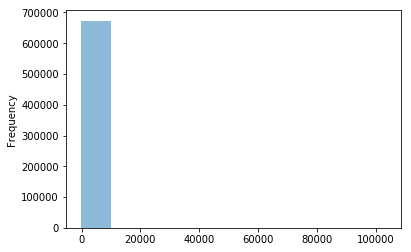

In [227]:
final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'].plot.hist(bins=10, alpha=0.5)

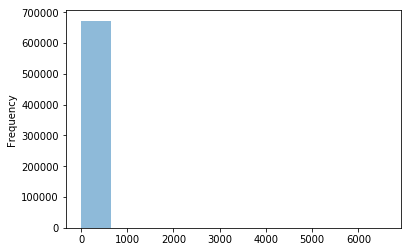

In [228]:
final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'].plot.hist(bins=10, alpha=0.5)

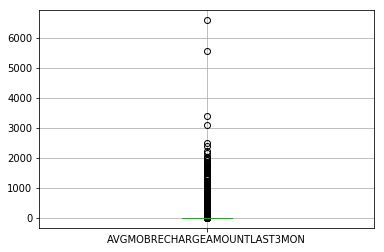

In [229]:
final_data_v2.boxplot(column=['AVGMOBRECHARGEAMOUNTLAST3MON'])

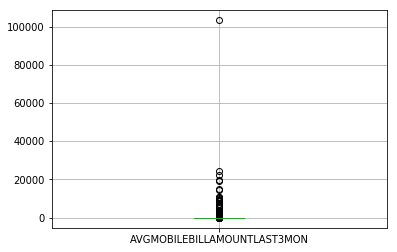

In [230]:
final_data_v2.boxplot(column=['AVGMOBILEBILLAMOUNTLAST3MON'])

In [231]:
def mobilebill(row):
    if row['PREPAIDPOSTPAIDFLAG'] == 0:
        return 0.0
    elif row['PREPAIDPOSTPAIDFLAG'] == 1:
        return float(str(row['AVGMOBRECHARGEAMOUNTLAST3MON']))
    elif row['PREPAIDPOSTPAIDFLAG'] == 2:
        if row['AVGMOBILEBILLAMOUNTLAST3MON'] != 0:
            return float(str(row['AVGMOBILEBILLAMOUNTLAST3MON']))
        else:
            return float(str(row['AVGMOBRECHARGEAMOUNTLAST3MON']))
        
"""  
prepost = 0 then monthly bill 0
prepost = 1 
then monthly bill = AVGMOBRECHARGEAMOUNTLAST3MON
prepost = 2 AND AVGMOBILEBILLAMOUNTLAST3MON = 0
then monthly bill = AVGMOBRECHARGEAMOUNTLAST3MON
else 
then monthly bill = AVGMOBILEBILLAMOUNTLAST3MON
"""

'  \nprepost = 0 then monthly bill 0\nprepost = 1 \nthen monthly bill = AVGMOBRECHARGEAMOUNTLAST3MON\nprepost = 2 AND AVGMOBILEBILLAMOUNTLAST3MON = 0\nthen monthly bill = AVGMOBRECHARGEAMOUNTLAST3MON\nelse \nthen monthly bill = AVGMOBILEBILLAMOUNTLAST3MON\n'

In [232]:
final_data_v2['Mobile_Bill'] = final_data_v2.apply(mobilebill, axis=1)

In [233]:
final_data_v2['Mobile_Bill'].describe()

count    673177.000000
mean          4.468718
std         152.108033
min        -191.160000
25%           0.000000
50%           0.000000
75%           0.000000
max      103279.440000
Name: Mobile_Bill, dtype: float64

In [234]:
def mobile_billbin(row):
    if row['Mobile_Bill'] > 0 and row['Mobile_Bill'] <= 50:
        return 1
    elif row['Mobile_Bill'] > 50 and row['Mobile_Bill'] <= 100:
        return 2
    elif row['Mobile_Bill'] > 100 and row['Mobile_Bill'] <= 150:
        return 3
    elif row['Mobile_Bill'] > 150 and row['Mobile_Bill'] <= 200:
        return 4
    elif row['Mobile_Bill'] > 200 and row['Mobile_Bill'] <= 250:
        return 5
    elif row['Mobile_Bill'] > 250 and row['Mobile_Bill'] <= 300:
        return 6
    elif row['Mobile_Bill'] > 300 and row['Mobile_Bill'] <= 350:
        return 7
    elif row['Mobile_Bill'] > 350 and row['Mobile_Bill'] <= 400:
        return 8
    elif row['Mobile_Bill'] > 400 and row['Mobile_Bill'] <= 450:
        return 9
    elif row['Mobile_Bill'] > 450 and row['Mobile_Bill'] <= 500:
        return 10
    elif row['Mobile_Bill'] > 500:
        return 11
    else:
        return 0

In [235]:
final_data_v2['Mobile_Bill_bin'] = final_data_v2.apply(mobile_billbin, axis=1)

In [236]:
final_data_v2.CIBIL_HIT.unique()

array(['Y', 'N'], dtype=object)

In [237]:
final_data_v2.SURROGATE.unique()

array([None, 'Banking', 'Income Proof', 'Own house proof',
       'Debit/Credit Card', 'CIBIL', 'CRIF', 'SAATHI', 'Repayment',
       'Business Proof', 'Car RC'], dtype=object)

In [238]:
final_data_v2.CIBIL_HIT.isnull().sum()

0

In [239]:
final_data_v2['IS_CIBIL_HIT'] = final_data_v2.apply(lambda x: 1 if x['CIBIL_HIT'] == 'Y' else 0, axis=1)

In [240]:
def is_surrogate(row):
    if row['SURROGATE'] == 'Banking':
        return 1
    elif row['SURROGATE'] == 'Debit/Credit Card':
        return 2
    elif row['SURROGATE'] == 'Own house proof':
        return 3
    elif row['SURROGATE'] == 'CIBIL':
        return 4
    elif row['SURROGATE'] == 'Repayment':
        return 5
    elif row['SURROGATE'] == 'Income Proof':
        return 6
    elif row['SURROGATE'] == 'SAATHI':
        return 7
    elif row['SURROGATE'] == 'CRIF':
        return 8
    elif row['SURROGATE'] == 'Business Proof':
        return 9
    elif row['SURROGATE'] == 'Car RC':
        return 10
    else:
        return 0
    

In [241]:
final_data_v2['SURROGATE_CAT'] = final_data_v2.apply(is_surrogate, axis=1)

In [242]:
final_data_v2.SURROGATE.isnull().sum()

370524

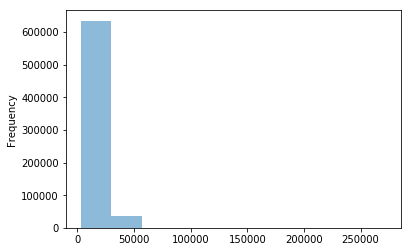

In [243]:
final_data_v2['ACTUAL_LOAN_AMOUNT'].plot.hist(bins=10, alpha=0.5)

In [244]:
final_data_v2['ACTUAL_LOAN_AMOUNT'].describe()

count    673177.00000
mean      15490.86250
std        7671.52948
min        3150.00000
25%       10493.00000
50%       13300.00000
75%       18000.00000
max      272000.00000
Name: ACTUAL_LOAN_AMOUNT, dtype: float64

In [245]:
tickets = np.percentile(final_data_v2['ACTUAL_LOAN_AMOUNT'], [10,20,30,40,50,60,70,80,90,100])

In [246]:
def ticketsize(row):
    if row['ACTUAL_LOAN_AMOUNT'] > 0 and row['ACTUAL_LOAN_AMOUNT'] <= tickets[0]:
        return 1
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[0] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[1]:
        return 2
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[1] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[2]:
        return 3
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[2] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[3]:
        return 4
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[3] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[4]:
        return 5
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[4] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[5]:
        return 6
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[5] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[6]:
        return 7
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[6] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[7]:
        return 8
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[7] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[8]:
        return 9
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[8] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[9]:
        return 10

In [247]:
final_data_v2['TICKET_SIZE'] = final_data_v2.apply(ticketsize, axis=1)

In [248]:
final_data_v2['TAT_DAYS'] = final_data_v2['TAT_DAYS'].fillna(value=0)

In [249]:
final_data_v2['TAT_DAYS'].describe()

count    673177.000000
mean          1.102250
std          16.217647
min           0.000000
25%           0.000000
50%           0.000000
75%           0.010000
max         416.640000
Name: TAT_DAYS, dtype: float64

In [250]:
final_data_v2.loc[final_data_v2['TAT_DAYS'] == 416.640000]

,PROPNO,AGMTNO,DEALER_CODE,PORTFOLIO,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,LATESTBALANCE,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,ADDRESS1,ADDRESS2,ADDRESS3,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,ELIGIBILITYGRID_REMARK,IS_MANDATE_REGISTERED,DELAER_NAME,DELAER_CATEGORY,IS_MOBILE,Mobile_active_hours,Mobile_Bill,Mobile_Bill_bin,IS_CIBIL_HIT,SURROGATE_CAT,TICKET_SIZE
217244,3078CD0063873,WB3078CD0063873,CD03449,CD,0,0.0,0.0,2018-10-04T15:38:16.775Z,2018-10-04T19:48:06.147Z,2018-10-04T19:52:35.597Z,DEALER,MOBILE,CD00124123,CDSPL,68.93,WB,357110091015681,SAMSUNG,Samsung MOBILE SM-J600GZKHINS,DT1234,None,CD_M_0245,Y,None,10150.0,Jalpaiguri,NaN,MALE,GRADUATE,24,722.0,None,L,RS,OWNED,SUBHASH PALLY,HYAMILTAN GANJUTTAR LATABARI,None,N,N,N,N,Y,N,DISBURSAL_TAT,9999.39,416.64,344.68,ACH,BDBL0001140,7,CD/TW -700+ norms met,1.0,STEP IN THE MOBILE SHOP,DS,1,4.0,0.0,0,1,0,3


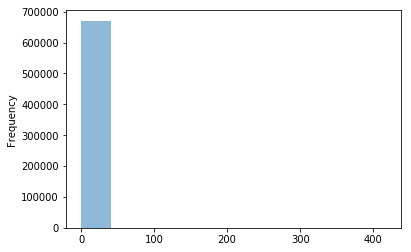

In [251]:
final_data_v2['TAT_DAYS'].plot.hist(bins=10, alpha=0.5)

In [252]:
final_data_v2['CROSS_SELL_INSURANCE'] = final_data_v2['SPL_INSURANCE_TYPE'].fillna(value=0)

In [253]:
final_data_v2['CROSS_SELL_INSURANCE'] = final_data_v2.apply(lambda x: 0 if x['CROSS_SELL_INSURANCE'] == 0 else 1, axis=1)

In [254]:
final_data_v2.to_csv("D:\CD_VARIABLES_Stage3_V1.csv", index=False)

In [256]:
final_data_v3 = pd.read_csv("D:\CD_VARIABLES_Stage3_V1.csv")

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (16,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [257]:
Dealer_city = pd.read_excel("D:\CD\DT_City_Code.xlsx")

In [258]:
Dealer_city.head()

,SZCITYCODE,SZDESC
0,DT,Navi Mumbai
1,DT,Utter Dinaspur
2,DT1,Bagalkot
3,DT10,Chitradurga
4,DT100,Ujjain


In [259]:
list(Dealer_city.loc[Dealer_city['SZCITYCODE'] == 'DT1008', 'SZDESC'])[0]

'Latur'

In [261]:
def dealer(row):
    if str(row['DEALER_CITY']).startswith('DT'):
        #print(row['DEALER_CITY'])
        row['DEALER_CITY'] = list(Dealer_city.loc[Dealer_city['SZCITYCODE'] == row['DEALER_CITY'], 'SZDESC'])[0]
            
    return row['DEALER_CITY']
    

In [262]:
final_data_v3['DEALER_CITY_V2'] = final_data_v3.apply(dealer, axis=1)

In [263]:
final_data_v3.to_csv("D:\CD\CD_VARIABLES_Stage3_V2.csv", index=False)

In [264]:
ifsc_df = pd.read_csv("D:\CD\IFSC_CODE\All_Bank_IFSC_CODE.csv")

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [265]:
ifsc_df.columns = ['BANK_NAME','IFSC_CODE','MICR_CODE','BANK_BRANCH','BANK_ADDRESS','BANK_CONTACT',
                   'BANK_CITY','BANK_DISTRICT','BANK_STATE']

In [266]:
ifsc_df.head()

,BANK_NAME,IFSC_CODE,MICR_CODE,BANK_BRANCH,BANK_ADDRESS,BANK_CONTACT,BANK_CITY,BANK_DISTRICT,BANK_STATE
0,ABU DHABI COMMERCIAL BANK,ADCB0000001,400269002,RTGS-HO,"75, REHMAT MANZIL, V. N. ROAD, CURCHGATE, MUMB...",39534100,MUMBAI,MUMBAI CITY,MAHARASHTRA
1,ABU DHABI COMMERCIAL BANK,ADCB0000002,560269002,BANGALORE,"CITI CENTRE, 28, CHURCH STREET, OFF M. G. ROAD...",25582000,BANGALORE,BANGALORE URBAN,KARNATAKA
2,ABHYUDAYA COOPERATIVE BANK LIMITED,ABHY0065001,400065001,RTGS-HO,"ABHYUDAYA BANK BLDG., B.NO.71, NEHRU NAGAR, KU...",25260173,MUMBAI,GREATER MUMBAI,MAHARASHTRA
3,ABHYUDAYA COOPERATIVE BANK LIMITED,ABHY0065002,400065002,ABHYUDAYA NAGAR,"ABHYUDAYA EDUCATION SOCIETY, OPP. BLDG. NO. 18...",24702643,MUMBAI,GREATER MUMBAI,MAHARASHTRA
4,ABHYUDAYA COOPERATIVE BANK LIMITED,ABHY0065003,400065003,BAIL BAZAR,"KMSPM'S SCHOOL, WADIA ESTATE, BAIL BAZAR-KURLA...",25032202,MUMBAI,GREATER MUMBAI,MAHARASHTRA


In [267]:
 final_data_bnk_info_v3 = pd.merge(final_data_v3, ifsc_df, on=['IFSC_CODE'], how='left')

In [268]:
 final_data_bnk_info_v3['DEALER_CITY_V2'].fillna("No Value", inplace = True)

In [269]:
 final_data_bnk_info_v3['CITY'].fillna("No Value", inplace = True)

In [270]:
final_data_bnk_info_v3['DEALER_CUST_CITY'] = final_data_bnk_info_v3.apply(lambda x: 
                                                                          1 if x['DEALER_CITY_V2'].lower() == x['CITY'].lower()
                                                                         else 0, axis=1)

In [271]:
 final_data_bnk_info_v3['BANK_CITY'].fillna("No Value", inplace = True)

In [272]:
final_data_bnk_info_v3['CUST_BANK_CITY_DIFF'] = final_data_bnk_info_v3.apply(lambda x: 
                                                                          1 if x['CITY'].lower() == x['BANK_CITY'].lower()
                                                                         else 0, axis=1)

In [296]:
tickets_age = np.percentile(final_data_v2['AGE'], [10,20,30,40,50,60,70,80,90,100])

In [303]:
tickets_age

array([23., 25., 27., 29., 31., 34., 37., 41., 47., 99.])

In [307]:
def ticketsize_age(row):
    if row['AGE'] >= 23 and row['AGE'] < 25:
        return 1
    elif row['AGE'] >= 25 and row['AGE'] < 27:
        return 2
    elif row['AGE'] >= 27 and row['AGE'] < 29:
        return 3
    elif row['AGE'] >= 29 and row['AGE'] < 31:
        return 4
    elif row['AGE'] >= 31 and row['AGE'] < 34:
        return 5
    elif row['AGE'] >= 34 and row['AGE'] < 37:
        return 6
    elif row['AGE'] >= 37 and row['AGE'] < 41:
        return 7
    elif row['AGE'] >= 41 and row['AGE'] < 47:
        return 8
    elif row['AGE'] >= 47 and row['AGE'] <= 99:
        return 9

In [308]:
final_data_bnk_info_v3['AGE_BIN'] = final_data_bnk_info_v3.apply(ticketsize_age, axis=1)

In [281]:
final_data_bnk_info_v3['CIBIL_SCORE_NEW'] = final_data_bnk_info_v3.apply(lambda x: 0 if x['CIBIL_SCORE'] <= 0 
                                                                         else x['CIBIL_SCORE'], axis = 1) 

In [288]:
final_data_bnk_info_v3.CIBIL_SCORE_NEW.describe()

count    672831.000000
mean        338.521609
std         357.853801
min           0.000000
25%           0.000000
50%           1.000000
75%         715.000000
max         900.000000
Name: CIBIL_SCORE_NEW, dtype: float64

In [289]:
def cibil_score_bin(row):
    if row['CIBIL_SCORE_NEW'] <= 0:
        return 1
    elif row['CIBIL_SCORE_NEW'] > 0 and row['CIBIL_SCORE_NEW'] <= 300:
        return 2
    elif row['CIBIL_SCORE_NEW'] > 301 and row['CIBIL_SCORE_NEW'] <= 400:
        return 3
    elif row['CIBIL_SCORE_NEW'] > 401 and row['CIBIL_SCORE_NEW'] <= 500:
        return 4
    elif row['CIBIL_SCORE_NEW'] > 501 and row['CIBIL_SCORE_NEW'] <= 600:
        return 5
    elif row['CIBIL_SCORE_NEW'] > 601 and row['CIBIL_SCORE_NEW'] <= 700:
        return 6
    elif row['CIBIL_SCORE_NEW'] > 701 and row['CIBIL_SCORE_NEW'] <= 800:
        return 7
    elif row['CIBIL_SCORE_NEW'] > 801 and row['CIBIL_SCORE_NEW'] <= 900:
        return 8
    elif row['CIBIL_SCORE_NEW'] > 901:
        return 9

In [290]:
final_data_bnk_info_v3['CIBIL_SCORE_NEW_BIN'] = final_data_bnk_info_v3.apply(cibil_score_bin, axis = 1)

In [293]:
def address_len(row):
    try:
        row['ADDRESS1_LEN'] = len(row['ADDRESS1'])
    except:
        row['ADDRESS1_LEN'] = 0
    try:
        row['ADDRESS2_LEN'] = len(row['ADDRESS2'])
    except:
        row['ADDRESS2_LEN'] = 0
    try:
        row['ADDRESS3_LEN'] = len(row['ADDRESS3'])
    except:
        row['ADDRESS3_LEN'] = 0
        
    return row

In [294]:
final_data_bnk_info_v4 = final_data_bnk_info_v3.apply(address_len, axis=1)

In [309]:
final_data_bnk_info_v4.head()

,PROPNO,AGMTNO,DEALER_CODE,PORTFOLIO,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,LATESTBALANCE,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,ADDRESS1,ADDRESS2,ADDRESS3,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,ELIGIBILITYGRID_REMARK,IS_MANDATE_REGISTERED,DELAER_NAME,DELAER_CATEGORY,IS_MOBILE,Mobile_active_hours,Mobile_Bill,Mobile_Bill_bin,IS_CIBIL_HIT,SURROGATE_CAT,TICKET_SIZE,CROSS_SELL_INSURANCE,DEALER_CITY_V2,BANK_NAME,MICR_CODE,BANK_BRANCH,BANK_ADDRESS,BANK_CONTACT,BANK_CITY,BANK_DISTRICT,BANK_STATE,DEALER_CUST_CITY,CUST_BANK_CITY_DIFF,AGE_BIN,CIBIL_SCORE_NEW,CIBIL_SCORE_NEW_BIN,ADDRESS1_LEN,ADDRESS2_LEN,ADDRESS3_LEN
0,3078CD0009160,WB3078CD0009160,CD00910,CD,0,0.0,0.0,2018-04-23T12:10:07.466Z,2018-04-23T12:14:29.339Z,2018-04-23T20:12:08.774Z,DEALER,TV,CD0003748,CDOEM,68.18,WB,NaN,SAMSUNG,SAMSUNG TV UA43K5002AKXXL,DT1234,NaN,CD_M_0085,Y,NaN,32611.0,Jalpaiguri,190758.16,MALE,SSC,32,-1.0,NaN,NaN,RS,OWNED,DUMCHIPARA TEA GARDEN,JATHA LINE. .,NaN,N,Y,N,N,Y,N,DISBURSAL_TAT,22.52,0.94,0.94,ADM,SBIN0002025,NaN,No eligibility criteria matched,1.0,GOYAL RADIOS,DD,0,0.0,0.0,0,1,0,10,0,Jalpaiguri,STATE BANK OF INDIA,735002505,BIRPARA,"PO BIRPARA,JALPAIGURI,WB",0,BIRPARA,JALPAIGURI,WEST BENGAL,1,0,5.0,0.0,1.0,21,15,0
1,3078CD0009162,WB3078CD0009162,CD00458,CD,0,0.0,0.0,2018-04-23T10:08:59.507Z,2018-04-23T15:37:31.502Z,2018-04-23T19:15:05.057Z,DEALER,TV,CD0007287,CDOEM,66.66,WB,NaN,SONY,SONY TV KLV-32R302E IN5,DT1223,NaN,CD_M_0153,Y,NaN,16332.0,Murshidabad,NaN,MALE,GRADUATE,23,-1.0,NaN,NaN,RS,OWNED,JHAUBANA NAWDA,JHAUBANA NAWDA,NaN,N,N,N,N,Y,N,DISBURSAL_TAT,144.43,6.02,4.02,ADM,SBIN0007104,NaN,No eligibility criteria matched,1.0,SUR SANGAM,DD,0,5.0,0.0,0,1,0,7,0,Murshidabad,STATE BANK OF INDIA,741002616,TRIMOHINI,"DIST MURSHIDABAD,WB 742133",0,TRIMOHINI,MURSHIDABAD,WEST BENGAL,1,0,1.0,0.0,1.0,14,14,0
2,3078CD0009161,WB3078CD0009161,CD00442,CD,0,0.0,0.0,NaN,NaN,NaN,DEALER,FRIDGE,CD0011224,CDOEM,66.65,WB,NaN,SAMSUNG,SAMSUNG FRIDGE RR20N2Y2ZD3/NL,DT1222,NaN,CD_M_0034,Y,NaN,11064.0,Bardhaman,NaN,MALE,12TH,43,-1.0,NaN,NaN,RS,OWNED,MATHRUN MONGALKOTE,MATHRUN BARDDHAMAN,NaN,N,N,N,N,Y,N,DISBURSAL_TAT,0.00,0.00,0.00,ACH,UBIN0540510,NaN,No eligibility criteria matched,1.0,ROY ELECTRONICS AND SERVICE CENTRE,DD,0,NaN,0.0,0,1,0,4,0,Bardhaman,UNION BANK OF INDIA,713026604,KAICHAR,ATPOST KAICHAR DIST. BURDWAN WEST BENGAL PI...,262236,KAICHAR,BARDHAMAN,WEST BENGAL,1,0,8.0,0.0,1.0,18,18,0
3,3009CD0000002,KA3009CD0000002,CD01183,CD,0,0.0,0.0,2018-03-17T10:49:16.175Z,2018-03-17T14:48:12.875Z,2018-03-17T19:14:46.949Z,DEALER,TV,CD0002970,CDOEM,66.67,KA,NaN,PANASONIC,PANASONIC TV TH-32E200DX,DT1128,NaN,CD_M_0038,Y,NaN,10800.0,Bangalore,11575.00,FEMALE,UNDER GRADUATE,26,726.0,NaN,NaN,RS,RENT,#242 2ND MAIN ROAD VIJAYANANDANAGAR,BANGALORE NORTHBANGALORE NANDINILAYOUT,NaN,N,N,N,N,Y,N,DISBURSAL_TAT,3.21,0.13,0.13,ACH,ICIC0002317,7.0,CD/TW -720+ norms met,1.0,E SHOPPE,DS,0,4.0,0.0,0,1,0,3,0,Bangalore,ICICI BANK LIMITED,560229072,CHANDRA LAYOUT,"ICICI BANK LTD., NO.1210,1ST STAGE,2ND PHASE,C...",0,BANGALORE,BANGALORE URBAN,KARNATAKA,1,1,2.0,726.0,7.0,35,39,0
4,3009CD0000011,KA3009CD0000011,CD01216,CD,0,0.0,0.0,NaN,NaN,NaN,DEALER,TV,CD0006206,CDOEM,66.66,KA,NaN,SAMSUNG,SAMSUNG TV UA32M4200DRLXL,DT1128,NaN,CD_M_0034,Y,NaN,17332.0,Bangalore,NaN,MALE,SSC,23,710.0,NaN,NaN,RS,OWNED,"U84, 2 nd main road",swathantrapalya srirampura,NaN,N,N,N,N,Y,N,DISBURSAL_TAT,3.00,0.13,0.00,ACH,SBIN0007080,4.0,CD/TW- 650-719 norms met,1.0,VENUS WORLD,DS,0,NaN,0.0,0,1,0,8,0,Bangalore,STATE BANK OF INDIA,560002031,MALLESWARAM,"143,MARGOSA ROAD,9TH CROSS,BANGALORE,PIN 560003",0,BANGALORE,BA

In [273]:
final_data_bnk_info_v3.to_csv("D:\CD\CD_VARIABLES_Stage3_V3.csv", index=False)

In [310]:
final_data_bnk_info_v4.to_csv("D:\CD\CD_VARIABLES_Stage3_V4.csv", index=False)

In [3]:
final_data_bnk_info_v4 = pd.read_csv("D:\CD\CD_VARIABLES_Stage3_V4.csv")

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (16,38,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
final_data_bnk_info_v4.count()

PROPNO                          676014
AGMTNO                          676014
DEALER_CODE                     676014
PORTFOLIO                       676014
PREPAIDPOSTPAIDFLAG             676014
AVGMOBILEBILLAMOUNTLAST3MON     676014
AVGMOBRECHARGEAMOUNTLAST3MON    676014
INSTALLTIME                     309420
LASTPINGTIME                    309420
REQUESTTIME                     309420
DEALER_TYPE                     676014
PRODUCT_CODE                    676014
MODEL_CODE                      676014
SCHEME_TYPE                     676014
LTV                             676014
STATE                           676014
IMEI_NUMBER                     329194
MAKE_CODE                       676014
MODEL_DESC                      676014
MODEL_DESC_V2_MAKE              676014
DEALER_CITY                     676014
REGISTRATION_TYPE                    0
SCHEME_CODE                     676014
CIBIL_HIT                       676014
SURROGATE                       303938
ACTUAL_LOAN_AMOUNT       

In [19]:
login_disp_p1 = pd.read_excel(r"D:\CD\14062019123719ToAnalytics_p1.xlsx")
login_disp_p2 = pd.read_excel(r"D:\CD\14062019123719ToAnalytics_p2.xlsx")
login_disp_p3 = pd.read_excel(r"D:\CD\14062019123719ToAnalytics_p3.xlsx")

In [20]:
login_disp_p1 = login_disp_p1.loc[~login_disp_p1['agreementNumber'].isnull()]
login_disp_p2 = login_disp_p2.loc[~login_disp_p2['agreementNumber'].isnull()]
login_disp_p3 = login_disp_p3.loc[~login_disp_p3['agreementNumber'].isnull()]

In [21]:
login_disp = login_disp_p1
login_disp = login_disp.append(login_disp_p2)
login_disp = login_disp.append(login_disp_p3)

In [22]:
(len(login_disp_p1._id.unique()), len(login_disp_p2._id.unique()) ,len(login_disp_p3._id.unique()))

(256820, 211806, 165702)

In [23]:
login_disp.columns = ['PROPNO', 'AGMTNO_v1', 'applAssetCtg', 'applAssetMake','D_LOGIN_TIME', 
                      'LOGIN_dateTime', 'croApprovedDate', 'loanDisbDate','residenceCity', 'Cust_bankName', 'bankIFSCCode']

In [24]:
len(login_disp.PROPNO.unique()) #drop_duplicates().count() #770460

634328

In [25]:
login_disp.count()

PROPNO             634328
AGMTNO_v1          634328
applAssetCtg       634279
applAssetMake      634279
D_LOGIN_TIME       634328
LOGIN_dateTime     634328
croApprovedDate    404919
loanDisbDate       634328
residenceCity      634327
Cust_bankName      600062
bankIFSCCode       600034
dtype: int64

In [26]:
login_disp.to_csv(r"D:\CD\login_disp.csv")

In [31]:
import gc
del login_disp
gc.collect()

NameError: name 'login_disp' is not defined

In [73]:
 final_data_bnk_info_v5 = pd.merge(final_data_bnk_info_v4, login_disp, on=['PROPNO'], how='left')

In [74]:
final_data_bnk_info_v5.count()

PROPNO                          676014
AGMTNO                          676014
DEALER_CODE                     676014
PORTFOLIO                       676014
PREPAIDPOSTPAIDFLAG             676014
AVGMOBILEBILLAMOUNTLAST3MON     676014
AVGMOBRECHARGEAMOUNTLAST3MON    676014
INSTALLTIME                     309420
LASTPINGTIME                    309420
REQUESTTIME                     309420
DEALER_TYPE                     676014
PRODUCT_CODE                    676014
MODEL_CODE                      676014
SCHEME_TYPE                     676014
LTV                             676014
STATE                           676014
IMEI_NUMBER                     329194
MAKE_CODE                       676014
MODEL_DESC                      676014
MODEL_DESC_V2_MAKE              676014
DEALER_CITY                     676014
REGISTRATION_TYPE                    0
SCHEME_CODE                     676014
CIBIL_HIT                       676014
SURROGATE                       303938
ACTUAL_LOAN_AMOUNT       

In [44]:
bank_class_df = pd.read_excel(r"D:/CD/IFSC_CODE/Bank_list_n _classification.xlsx")

In [119]:
import io
buffer = io.StringIO()
final_data_bnk_info_v6.info(buf=buffer)
s = buffer.getvalue()
pd.DataFrame(s.split('\n')).iloc[3:99,:]

In [135]:
final_data_bnk_info_v6 = pd.merge(final_data_bnk_info_v5, bank_class_df, how='left', left_on=['BANK_NAME'], right_on=['Bank_Name'])

In [136]:
final_data_bnk_info_v6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676014 entries, 0 to 676013
Data columns (total 93 columns):
PROPNO                          676014 non-null object
AGMTNO                          676014 non-null object
DEALER_CODE                     676014 non-null object
PORTFOLIO                       676014 non-null object
PREPAIDPOSTPAIDFLAG             676014 non-null int64
AVGMOBILEBILLAMOUNTLAST3MON     676014 non-null float64
AVGMOBRECHARGEAMOUNTLAST3MON    676014 non-null float64
INSTALLTIME                     309420 non-null object
LASTPINGTIME                    309420 non-null object
REQUESTTIME                     309420 non-null object
DEALER_TYPE                     676014 non-null object
PRODUCT_CODE                    676014 non-null object
MODEL_CODE                      676014 non-null object
SCHEME_TYPE                     676014 non-null object
LTV                             676014 non-null float64
STATE                           676014 non-null object
IMEI_NU

In [137]:
final_data_bnk_info_v6['Actual_TAT_Days'] = final_data_bnk_info_v6.apply(lambda x: (x['loanDisbDate'] - x['D_LOGIN_TIME']).days ,axis=1)

In [138]:
def month_bin(row):
    mont = row['loanDisbDate'].month
    if mont <= 10:
        return 1
    elif mont > 10 and mont <= 20:
        return 2
    else:
        return 3

In [139]:
final_data_bnk_info_v6['Disp_Month_bin'] = final_data_bnk_info_v6.apply(month_bin, axis=1)

In [140]:
def mark_weenend(row):
    week = row['D_LOGIN_TIME'].weekday()
    if week < 5:
        return 0
    else:
        return 1

In [141]:
final_data_bnk_info_v6['IS_WEEKEND'] = final_data_bnk_info_v6.apply(mark_weenend, axis=1)

In [147]:
final_data_bnk_info_v6.count()

PROPNO                          676010
AGMTNO                          676010
DEALER_CODE                     676010
PORTFOLIO                       676010
PREPAIDPOSTPAIDFLAG             676010
AVGMOBILEBILLAMOUNTLAST3MON     676010
AVGMOBRECHARGEAMOUNTLAST3MON    676010
INSTALLTIME                     309417
LASTPINGTIME                    309417
REQUESTTIME                     309417
DEALER_TYPE                     676010
PRODUCT_CODE                    676010
MODEL_CODE                      676010
SCHEME_TYPE                     676010
LTV                             676010
STATE                           676010
IMEI_NUMBER                     329192
MAKE_CODE                       676010
MODEL_DESC                      676010
MODEL_DESC_V2_MAKE              676010
DEALER_CITY                     676010
REGISTRATION_TYPE                    0
SCHEME_CODE                     676010
CIBIL_HIT                       676010
SURROGATE                       303937
ACTUAL_LOAN_AMOUNT       

In [146]:
final_data_bnk_info_v6 = final_data_bnk_info_v6.drop_duplicates()

In [148]:
final_data_bnk_info_v6.to_csv("D:\CD\CD_VARIABLES_Stage3_V7.csv", index=False)

In [125]:
final_data_bnk_info_v6 = pd.read_csv("D:\CD\CD_VARIABLES_Stage3_V5.csv")

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
final_data_bnk_info_v6['Mobile_active_hours'].isnull().sum()

0

In [129]:
final_data_bnk_info_v6['Mobile_active_hours'] = final_data_bnk_info_v6['Mobile_active_hours'].fillna(value=0)

In [132]:
final_data_bnk_info_v6.to_csv("D:\CD\CD_VARIABLES_Stage3_V6.csv", index=False)

In [145]:
final_data_bnk_info_v6.columns

Index(['PROPNO', 'AGMTNO', 'DEALER_CODE', 'PORTFOLIO', 'PREPAIDPOSTPAIDFLAG',
       'AVGMOBILEBILLAMOUNTLAST3MON', 'AVGMOBRECHARGEAMOUNTLAST3MON',
       'INSTALLTIME', 'LASTPINGTIME', 'REQUESTTIME', 'DEALER_TYPE',
       'PRODUCT_CODE', 'MODEL_CODE', 'SCHEME_TYPE', 'LTV', 'STATE',
       'IMEI_NUMBER', 'MAKE_CODE', 'MODEL_DESC', 'MODEL_DESC_V2_MAKE',
       'DEALER_CITY', 'REGISTRATION_TYPE', 'SCHEME_CODE', 'CIBIL_HIT',
       'SURROGATE', 'ACTUAL_LOAN_AMOUNT', 'CITY', 'LATESTBALANCE', 'GENDER',
       'QUALIFICATION', 'AGE', 'CIBIL_SCORE', 'EXISTING_CUSTOMER',
       'SPL_INSURANCE_TYPE', 'ADDRESS_TYPE', 'RESIDENT_TYPE', 'ADDRESS1',
       'ADDRESS2', 'ADDRESS3', 'VOTERID', 'PANNO', 'DRIVING_LICENSE',
       'PASSPORT', 'AADHAR', 'RATION', 'ACTIVITY_CODE', 'TAT_HOUR', 'TAT_DAYS',
       'TAT_DAYS_EXCLUDE_SUNDAY', 'PAYMENT_TYPE', 'IFSC_CODE',
       'ELIGIBILITYGRID', 'ELIGIBILITYGRID_REMARK', 'IS_MANDATE_REGISTERED',
       'DELAER_NAME', 'DELAER_CATEGORY', 'IS_MOBILE', 'Mobile_acti

In [32]:
final_new = pd.read_csv("D:\CD\CD_VARIABLES_Stage3_V7_v1.csv")

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (16,38,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
final_new.columns

Index(['PROPNO', 'AGMTNO', 'DEALER_CODE', 'PORTFOLIO', 'PREPAIDPOSTPAIDFLAG',
       'AVGMOBILEBILLAMOUNTLAST3MON', 'AVGMOBRECHARGEAMOUNTLAST3MON',
       'INSTALLTIME', 'LASTPINGTIME', 'REQUESTTIME', 'DEALER_TYPE',
       'PRODUCT_CODE', 'MODEL_CODE', 'SCHEME_TYPE', 'LTV', 'STATE',
       'IMEI_NUMBER', 'MAKE_CODE', 'MODEL_DESC', 'MODEL_DESC_V2_MAKE',
       'DEALER_CITY', 'REGISTRATION_TYPE', 'SCHEME_CODE', 'CIBIL_HIT',
       'SURROGATE', 'ACTUAL_LOAN_AMOUNT', 'CITY', 'LATESTBALANCE', 'GENDER',
       'QUALIFICATION', 'AGE', 'CIBIL_SCORE', 'EXISTING_CUSTOMER',
       'SPL_INSURANCE_TYPE', 'ADDRESS_TYPE', 'RESIDENT_TYPE', 'ADDRESS1',
       'ADDRESS2', 'ADDRESS3', 'VOTERID', 'PANNO', 'DRIVING_LICENSE',
       'PASSPORT', 'AADHAR', 'RATION', 'ACTIVITY_CODE', 'TAT_HOUR', 'TAT_DAYS',
       'TAT_DAYS_EXCLUDE_SUNDAY', 'PAYMENT_TYPE', 'IFSC_CODE',
       'ELIGIBILITYGRID', 'ELIGIBILITYGRID_REMARK', 'IS_MANDATE_REGISTERED',
       'DELAER_NAME', 'DELAER_CATEGORY', 'IS_MOBILE', 'Mobile_acti

In [10]:
from datetime import datetime

In [13]:
final_new['loanDisbDate'].isnull().sum()

38070

In [16]:
query2 = "SELECT DISTINCT AGREEMENTNUMBER, \
DATEOFENQUIRY, \
ENQUIRINGMEMBERSHORTNAME, \
ENQUIRYPURPOSE \
FROM \
BIUSR.TBL_TRN_CIBIL_IQ_DETAILS \
WHERE ENQUIRINGMEMBERSHORTNAME = 'TVS CREDIT'"

In [17]:
Data2 = pd.read_sql(query2, con=connection, chunksize=40000)

In [18]:
data2 = pd.concat([chunk for chunk in Data2])

In [27]:
data2.to_csv("D:\CD\EXisting_Cust.csv")

In [ ]:
data2.count()

In [ ]:
final_new.loc[final_new['loanDisbDate'].isnull()]